<a href="https://colab.research.google.com/github/bbybsod/Algorithm-ant-colony-optimitazion/blob/main/jarak_pengangkutan_ACO_algorthm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library yang dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import copy

# Initialization parameter Ant Colony optimitazion

In [ ]:
alpha = 1
beta = 1
rho = 0.05
Q = 1
iteration = 100
pheromone_init = 0.1
m = 6

# data Nama Lokasi

In [ ]:
locations = [
    "TPA", "Jl. Marelan Raya", "Jl. Baut", "Jl. Pasar 1 Tengah",
    "Komplek Suzuya Plaza", "Komplek Marelan 88", "Komplek Deli Indah",
    "Komplek Maryland", "Komplek Sejati", "Rs Esmun"
]

# Matrix distance

In [ ]:
d = np.array([
    [0, 2.0, 5.9, 5.1, 6.1, 2.8, 4.0, 6.0, 5.3, 4.8],
    [2.0, 0, 1.6, 2.1, 0.35, 3.9, 2.0, 0.65, 0.9, 0.65],
    [5.9, 1.6, 0, 1.8, 1.4, 4.4, 4.2, 1.5, 1.5, 1.1],
    [5.1, 2.1, 1.8, 0, 2.5, 3.6, 2.8, 2.8, 2.0, 1.5],
    [6.1, 0.35, 1.4, 2.5, 0, 4.6, 4.4, 0.7, 0.75, 1.3],
    [2.8, 3.9, 4.4, 3.6, 4.6, 0, 1.7, 4.6, 3.8, 3.3],
    [4.0, 2.0, 4.2, 2.8, 4.4, 1.7, 0, 4.4, 3.7, 3.2],
    [6.0, 0.65, 1.5, 2.8, 0.7, 4.6, 4.4, 0, 0.7, 1.3],
    [5.3, 0.9, 1.5, 2.0, 0.75, 3.8, 3.7, 0.7, 0, 0.6],
    [4.8, 0.65, 1.1, 1.5, 1.3, 3.3, 3.2, 1.3, 0.6, 0]
])

n = len(d)

# Fungsi-fungsi utama ant colony optimitazion

In [ ]:
def findroute(rute, antnumber, temp_visibility, pheromone):
    i = copy.copy(antnumber)
    p_feature = np.power(pheromone, alpha)
    v_feature = np.power(temp_visibility, beta)
    combine = np.multiply(p_feature, v_feature)
    for j in range(n - 1):
        cur = int(rute[i, j])
        combine[:, cur] = 0
        prob = combine[cur, :]
        total = np.sum(prob)
        cum_prob = np.cumsum(prob / total)
        r = np.random.random()
        city = np.where(cum_prob > r)[0][0]
        rute[i, j + 1] = city
    return rute

def findrouteallant(rute, pheromone, visibility):
    temp_visibility = np.array(visibility)
    for i in range(m):
        rute = findroute(rute, i, temp_visibility, pheromone)
    return rute

def totaldistancetour(tour):
    jarak = 0
    tour = tour.astype(int)
    for i in range(len(tour) - 1):
        jarak += d[tour[i]][tour[i + 1]]
    jarak += d[tour[-1]][tour[0]]
    return jarak

def evaluate(ants):
    ants = ants.tolist()
    evaluations = [totaldistancetour(np.array(tour)) for tour in ants]
    return evaluations

def updatepheromone(pheromone, rute, evaluasi):
    for i in range(m):
        for j in range(n - 1):
            dt = Q / evaluasi[i]
            pheromone[int(rute[i, j]), int(rute[i, j + 1])] += dt
    return pheromone

def performancerecord(evaluasi, rute, bestperformance, solutionarray, performancearray, bestperformancearray):
    currentperformance = min(evaluasi)
    currentsolution = rute[np.argmin(evaluasi)]
    if currentperformance < bestperformance:
        bestperformance = copy.copy(currentperformance)
    solutionarray.append(currentsolution)
    performancearray.append(currentperformance)
    bestperformancearray.append(bestperformance)
    return solutionarray, performancearray, bestperformancearray, bestperformance

# inisialisasi awal

In [ ]:
visibility = 1 / (d + np.eye(n))
np.fill_diagonal(visibility, 0)
pheromone = pheromone_init * np.ones((n, n))
temp_visibility = np.array(visibility)
rute = np.zeros((m, n))
bestperformance = np.inf
solutionarray = []
performancearray = []
bestperformancearray = []

# output awal

In [ ]:
print("Nilai Feromon Awal (pheromone):")
print(np.round(pheromone, 1))

print("\nMatriks Visibility (1 / jarak):")
print(np.round(visibility, 6))

print("\nTemp Visibility (copy dari visibility):")
print(np.round(temp_visibility, 6))

Nilai Feromon Awal (pheromone):
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]

Matriks Visibility (1 / jarak):
[[0.       0.5      0.169492 0.196078 0.163934 0.357143 0.25     0.166667
  0.188679 0.208333]
 [0.5      0.       0.625    0.47619  2.857143 0.25641  0.5      1.538462
  1.111111 1.538462]
 [0.169492 0.625    0.       0.555556 0.714286 0.227273 0.238095 0.666667
  0.666667 0.909091]
 [0.196078 0.47619  0.555556 0.       0.4      0.277778 0.357143 0.357143
  0.5      0.666667]
 [0.163934 2.857143 0.714286 0.4      0.       0.217391 0.227273 1.428571
  1.333333 0.769231]
 [0.357143 0.25641  0.227273 

#  output findroute

In [33]:
rute = findroute(rute,0,temp_visibility, pheromone,)
print(np.round(rute, 1))

\ Rute kendaraan pada iterasi 1:
[[0. 1. 6. 5. 2. 8. 9. 3. 4. 7.]
 [0. 1. 4. 7. 8. 9. 2. 3. 5. 6.]
 [0. 1. 4. 8. 9. 2. 3. 5. 6. 7.]
 [0. 1. 7. 4. 9. 2. 3. 6. 5. 8.]
 [0. 1. 4. 7. 8. 9. 2. 3. 6. 5.]
 [0. 1. 4. 8. 9. 7. 2. 6. 5. 3.]]


# output findrouteallant

In [34]:
rute = findrouteallant(rute,pheromone,visibility)
print(np.round(rute, 1))

[[0. 1. 4. 7. 8. 3. 6. 5. 9. 2.]
 [0. 1. 4. 2. 6. 5. 3. 8. 9. 7.]
 [0. 1. 4. 7. 8. 2. 3. 6. 5. 9.]
 [0. 1. 4. 8. 9. 3. 6. 5. 7. 2.]
 [0. 1. 4. 7. 8. 9. 3. 6. 5. 2.]
 [0. 1. 7. 8. 2. 3. 6. 5. 9. 4.]]


# rute pengangkut sampah WK1

In [ ]:
print("\Rute kendaraan pengangkut sampah WK 1:")
print(np.round(rute, 1))

\Rute kendaraan pengangkut sampah WK 1:
[[0. 8. 2. 1. 3. 4. 9. 7. 5. 6.]
 [0. 5. 2. 1. 7. 8. 9. 4. 6. 3.]
 [0. 2. 4. 7. 1. 5. 8. 3. 6. 9.]
 [0. 4. 1. 6. 5. 3. 2. 9. 8. 7.]
 [0. 1. 9. 4. 8. 3. 5. 6. 7. 2.]
 [0. 1. 7. 8. 2. 5. 6. 4. 9. 3.]]


# rute kendaraan dan total jarak tempuh kendaraan

In [35]:
df_rute = pd.DataFrame({
    "sequence": [list(map(int, r)) for r in rute],
    "evaluation": [round(e, 2) for e in evaluasi]
})

print("\\nTabel Rute Kendaraan dan Total Jarak Tempuhnya:")
print(df_rute)


\nTabel Rute Kendaraan dan Total Jarak Tempuhnya:
                         sequence  evaluation
0  [0, 1, 4, 7, 8, 3, 6, 5, 9, 2]       20.55
1  [0, 1, 4, 2, 6, 5, 3, 8, 9, 7]       16.55
2  [0, 1, 4, 7, 8, 2, 3, 6, 5, 9]       22.30
3  [0, 1, 4, 8, 9, 3, 6, 5, 7, 2]       21.15
4  [0, 1, 4, 7, 8, 9, 3, 6, 5, 2]       14.55
5  [0, 1, 7, 8, 2, 3, 6, 5, 9, 4]       21.10


# bestperformance pada WK1

In [39]:
print("Best Performance pada WK1:")
print(bestperformancearray[0])

Best Performance pada WK1:
19.3


# update feromon

In [ ]:
pheromone = updatepheromone(pheromone, rute, evaluasi)
print("\nFeromon setelah update:")
print(np.round(pheromone, 6))


Feromon setelah update:
[[ 0.1      23.934935  0.31246   1.691399  0.495617  3.397788  0.262671
   0.435712  0.412278  0.55563 ]
 [ 0.1       0.1       0.437339  0.282866 21.032634  0.270295  0.723518
   2.707661  1.786614  2.748466]
 [ 0.1       0.692789  0.1      14.050634  0.896758  2.442984  2.149876
   1.751153  2.772086  3.577256]
 [ 0.1       0.989842  1.962573  0.1       1.685277  6.36676  11.573892
   1.223733  1.370432  2.640305]
 [ 0.1       2.037186  4.451416  0.593958  0.1       0.733531  0.870922
  11.835668  6.838598  1.912918]
 [ 0.1       0.434232  2.079023  1.759028  0.632699  0.1      13.2199
   1.970356  1.106395  2.484963]
 [ 0.1       0.816787  1.402408  3.94462   0.353671 14.469899  0.1
   2.710021  1.241258  0.685121]
 [ 0.1       0.80384   5.617595  2.138528  5.220531  0.75852   1.091882
   0.1      11.635772  1.068612]
 [ 0.1       0.716774  2.529073  1.83191   0.531607  0.560594  1.131211
   6.657054  0.1      15.825217]
 [ 0.1       1.072104 12.706602  5.20

# Ambil current performance dan current solution terakhir

In [36]:
currentperformance = min(evaluasi)
currentsolution = rute[np.argmin(evaluasi)]

print("\nCurrent Performance (terakhir):")
print(round(currentperformance, 2))

print("\nCurrent Solution (rute terbaik terakhir):")
print([int(i) for i in currentsolution])


Current Performance (terakhir):
14.55

Current Solution (rute terbaik terakhir):
[0, 1, 4, 7, 8, 9, 3, 6, 5, 2]


# iterasi ACO

In [32]:
for ite in range(iteration):
    rute = findrouteallant(rute, pheromone, visibility)
    evaluasi = evaluate(rute)
    pheromone = updatepheromone(pheromone, rute, evaluasi)
    solutionarray, performancearray, bestperformancearray, bestperformance = performancerecord(
        evaluasi, rute, bestperformance, solutionarray, performancearray, bestperformancearray)

# performa dan solusi rute terakhir

In [41]:
currentperformance = performancearray[-1]
currentsolution = solutionarray[-1].astype(int)
print("\nCurrent Performance (iterasi terakhir):", round(currentperformance, 2))
print("Current Solution:", list(currentsolution))


Current Performance (iterasi terakhir): 14.55
Current Solution: [np.int64(0), np.int64(1), np.int64(4), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(6), np.int64(5), np.int64(2)]


# rute terakhir

In [42]:
best_index = np.argmin(evaluasi)
rute_akhir = rute[best_index].astype(int)
print("\nRute Akhir (Solusi Optimal):")
print(" -> ".join([locations[i] for i in rute_akhir] + [locations[rute_akhir[0]]]))
print("Total Jarak Tempuh Rute Akhir:", round(evaluasi[best_index], 2))


Rute Akhir (Solusi Optimal):
TPA -> Jl. Marelan Raya -> Komplek Suzuya Plaza -> Komplek Maryland -> Komplek Sejati -> Rs Esmun -> Jl. Pasar 1 Tengah -> Komplek Deli Indah -> Komplek Marelan 88 -> Jl. Baut -> TPA
Total Jarak Tempuh Rute Akhir: 14.55


# hasil rute terbaik

In [ ]:
print("Rute terbaik:")
best_route = solutionarray[-1].astype(int)
print(" -> ".join([locations[i] for i in best_route] + [locations[best_route[0]]]))
print("Jarak tempuh minimum:", bestperformance)

Rute terbaik:
TPA -> Jl. Marelan Raya -> Komplek Suzuya Plaza -> Komplek Maryland -> Jl. Baut -> Komplek Sejati -> Rs Esmun -> Jl. Pasar 1 Tengah -> Komplek Deli Indah -> Komplek Marelan 88 -> TPA
Jarak tempuh minimum: 14.549999999999997


# Plot hasil performa menggunakan matplotplib

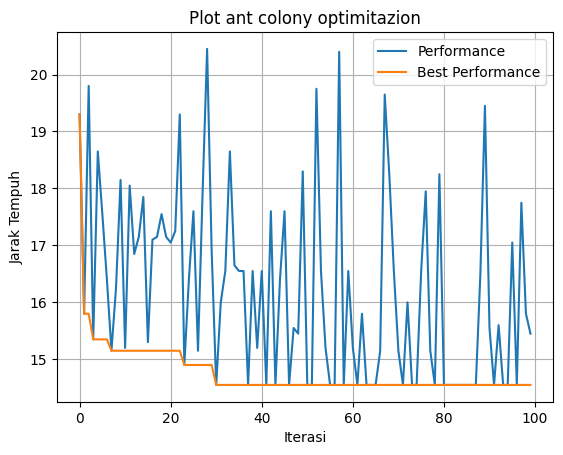

In [ ]:
plt.plot(performancearray, label="Performance")
plt.plot(bestperformancearray, label="Best Performance")
plt.title("Plot ant colony optimitazion")
plt.xlabel("Iterasi")
plt.ylabel("Jarak Tempuh")
plt.legend()
plt.grid()
plt.show()